In [1]:
import cv2
import easygui
import numpy as np
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import *
from PIL import ImageTk, Image

In [2]:
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='maroon')
label=Label(top,background='#f7c8f5', fg='#000000', font=('calibri',20,'bold'))

In [3]:
""" fileopenbox opens the box to choose file
and help us store file path as string """
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

In [4]:
def cartoonify(ImagePath):
#read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    
# confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()    

# To transform an image to a cartoon, we start by getting the edges of the image to highlight them
    grayscale = cv2.cvtColor(originalmage, cv2.COLOR_RGB2GRAY)
    smooth = cv2.medianBlur(grayscale, 5)
    getEdge = cv2.adaptiveThreshold(smooth, 255, 
      cv2.ADAPTIVE_THRESH_MEAN_C, 
      cv2.THRESH_BINARY, 9, 9)
    
# Then, we smooth the colors of the image keeping the edges sharp
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    
# Overlay the two images to get the cartoon effect
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    
    plots = [originalmage, grayscale, smooth, getEdge, colorImage, cartoonImage]
    plots = [originalmage, grayscale, smooth, getEdge, colorImage, cartoonImage]
    fig, axes = plt.subplots(3,2, figsize=(15,15), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(plots[i], cmap='gray')
    
    save_button = Button(top,text="Save cartoon image",command=lambda: save(cartoonImage, ImagePath),padx=30,pady=5)
    save_button.configure(background='#364156', foreground='black',font=('calibri',10,'bold'))
    save_button.pack(side=TOP,pady=50)
    
    plt.show()

In [5]:
def save(img, path):
    #saving an image using imwrite()
    newName=os.path.splitext(path)[0]+"_cartoonified"
    org_path = os.path.dirname(path)
    extension=os.path.splitext(path)[1]
    path = os.path.join(org_path, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    msg = "Image saved by name at "+ path
    tk.messagebox.showinfo(title=None, message=msg)

In [6]:
upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#f7c8f5', foreground='black',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

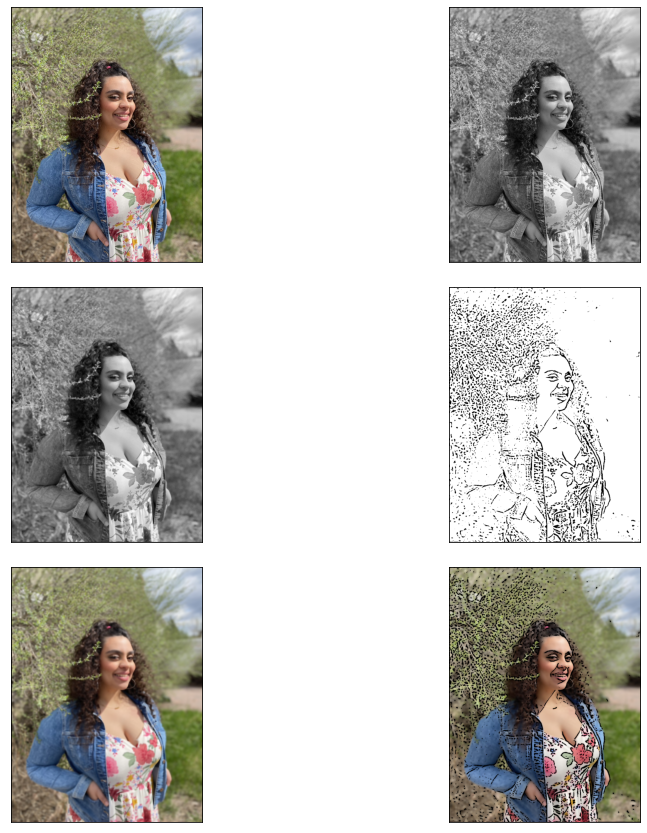

In [7]:
top.mainloop()